# **LOAN DEFAULT PREDICTION**

In [3]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

import pandas as pd
info = pd.read_csv("Default_Fin.csv")

Q1:- What is the number of people who will be given a grace period of exactly 15 days?

In [5]:
People_with_grace15 = info[(info["Defaulted?"]==1) & (info["Employed"]==1) & (info["Annual Salary"]>100000) & (info["Bank Balance"]>5000)].value_counts()

print("Number of people who will be given a grace period of exactly 15 days:- ", len(People_with_grace15),"\n")

print("Data of people who will be given a grace period of exactly 15 days:- ")
print(People_with_grace15) 

Number of people who will be given a grace period of exactly 15 days:-  206 

Data of people who will be given a grace period of exactly 15 days:- 
Index  Employed  Bank Balance  Annual Salary  Defaulted?
207    1         22675.20      587474.04      1             1
6795   1         18103.80      445335.72      1             1
6422   1         21666.72      481437.48      1             1
6450   1         19806.96      378171.12      1             1
6462   1         25496.04      534240.00      1             1
                                                           ..
3377   1         24971.28      413930.04      1             1
3380   1         20780.16      674747.04      1             1
3386   1         22844.04      494082.00      1             1
3392   1         17862.72      267082.32      1             1
9979   1         26429.52      567447.12      1             1
Length: 206, dtype: int64


Q2:- Find the maximum fine that can be levied by the bank in the period of 15 days.

In [6]:

maximum_balance = info["Bank Balance"][(info["Defaulted?"]==1) & (info["Annual Salary"]>100000) & (info["Bank Balance"]>5000)].max()


maximum_fine = (2.5*maximum_balance*15)/100

print("Maximum fine that can be levied by the bank in the period of 15 days is:- ", maximum_fine)

Maximum fine that can be levied by the bank in the period of 15 days is:-  11944.44


Q3:- Assuming that all the people falling in the category defaulters have not paid their EMI in the grace period, What is the total amount being generated by the bank as a part of the fine?


In [7]:

total_fine=0


for i in info.index:
  if info.loc[i,"Defaulted?"]==1:    
     total_fine+=(2.5*info.loc[i,"Bank Balance"]*15)/100     

print(round(total_fine,2))     

2619110.57


Q4:- Use a suitable plot to show the difference between the bank balance of people eligible for grace period, and those who are not.

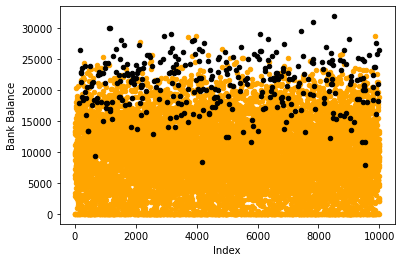

In [8]:

info["Grace Given?"]=((info["Defaulted?"]==1) & (info["Annual Salary"]>100000) & (info["Bank Balance"]>5000)).astype(int)


import matplotlib.pyplot as plt

axis = plt.gca()


info[info["Grace Given?"] == 0].plot(kind = "scatter", x = "Index", y = "Bank Balance", color = "orange", ax=axis)


info[info["Grace Given?"] == 1].plot(kind = "scatter", x = "Index", y = "Bank Balance", color = "black", ax=axis)

plt.show()

1) The orange dots reppresent the people who are not eligible for the grace. 

2) The black dots represent the people who are eligible for the grace.

Q5:- Find the difference between the median of the bank balance of those people who are eligible for Grace Period and the original value


In [9]:


info["Bank Balance"].median()

9883.619999999999

In [10]:


info.loc[info["Grace Given?"]==1, "Bank Balance"].median()

21469.08

In [11]:


median_difference = abs(info["Bank Balance"].median() - info.loc[info["Grace Given?"]==1, "Bank Balance"].median())

print("Difference between both the medians:- ",round(median_difference,2))

Difference between both the medians:-  11585.46


Q6:- Use a suitable graph to show the changes in the annual income of those people who are eligible for grace period and those who are not.


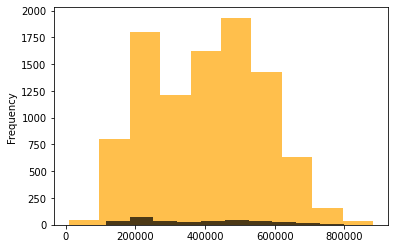

In [12]:

people_without_grace=info.loc[info["Grace Given?"]==0,"Annual Salary"]
people_without_grace.plot.hist(color="orange",alpha=0.7)


people_with_grace=info.loc[info["Grace Given?"]==1,"Annual Salary"]
people_with_grace.plot.hist(color="black",alpha=0.7)

plt.show()

1) The orange area represents the people who are not eligible for the grace.

2) The black area represents the people who are eligible for the grace.